### Description
### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
sns.set()


pd.set_option("display.max_columns", None) # Removes the limit for the number of displayed columns

pd.set_option("display.max_rows", 200) # Sets the limit for the number of displayed rows

loan = pd.read_csv("Loan_Modelling.csv", engine="python")

# checking the shape of the data
print(f"There are {loan.shape[0]} rows and {loan.shape[1]} columns.")  # f-string


There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [2]:
df = loan.copy()

<IPython.core.display.Javascript object>

### EDA

In [3]:
df.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2546,2547,50,25,9,91911,2,0.0,1,0,0,1,0,0,0
2178,2179,37,13,158,93943,2,2.3,2,0,1,0,1,1,1
1448,1449,41,16,49,92122,3,0.5,3,0,0,0,0,1,0
3373,3374,28,2,182,92660,3,7.2,2,442,1,0,1,1,1
1826,1827,59,33,35,91105,1,0.2,1,171,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Understanding the Data

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

- All columns are numeric, either int64 or float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

- Experience has -3 has minimum experience. This could be an anomaly.
- Some variables such as Income, Mortgage, and a few others seem to have some outliers based on the difference between the mean, std dev, minimum and maximum values. Subsequent visualizations should illustrate this. 
- Zipcodes and education could be binned depending on zones/neighborhoods instead of being handled as individual numbers.
- There are also a lot of 0s as values. This will need to be investigated further to ensure that there are meaningful values and not missing variables.
- ID seems to have been only used for identification purposes. It'll therefore be dropped from the analysis.

In [7]:
df = df.drop("ID", axis=1)
cols = df.columns
cols

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Checking the unique values in the columns

In [8]:
colz = df.describe().columns
for i in colz:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Age are :
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
Unique values in Experience are :
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2     

<IPython.core.display.Javascript object>

- Checking for the nature of 0s in some of the columns

In [9]:
df[df["ZIPCode"] == 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


<IPython.core.display.Javascript object>

In [10]:
df[df["Mortgage"] == 0].sample(6)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1439,59,29,61,94025,1,1.4,3,0,0,0,0,0,0
3619,45,20,42,94703,1,0.3,3,0,0,0,0,1,0
1338,51,27,42,90245,4,0.1,3,0,0,0,0,0,0
1235,54,28,60,94110,4,2.6,3,0,0,0,0,0,0
3215,40,15,19,90630,4,0.2,3,0,0,0,0,1,0
4090,42,18,49,92717,3,2.1,3,0,0,1,0,1,0


<IPython.core.display.Javascript object>

- Columns with more than 5 levels are Age, Experience, Income, ZIPCode, CCAvg, and Mortgage. With need, these can be simplified further by binning.
- Personal_Loan, Securities_Account, CD_Account, Online and CreditCard all have two levels 0 (No) and 1 (Yes)
- Education has 3 levels, which will be binned as 1- Undergrad, 2- Graduate, and 3- Advanced/Professional
- Family has 4 levels, which too could be binned if need be.
- All unique values are either positive or 0, apart from three, -1,-2,-3, in experience. It is unlikely that one has negative experience, so these values will be dealt with accordingly.
- Mortgage has a noticeably high number of 0s, but upon checking them, the column seems to be okay, because it is plausible than a person doesn't have any mortgage.

### Univeriate Analysis

In [11]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Age

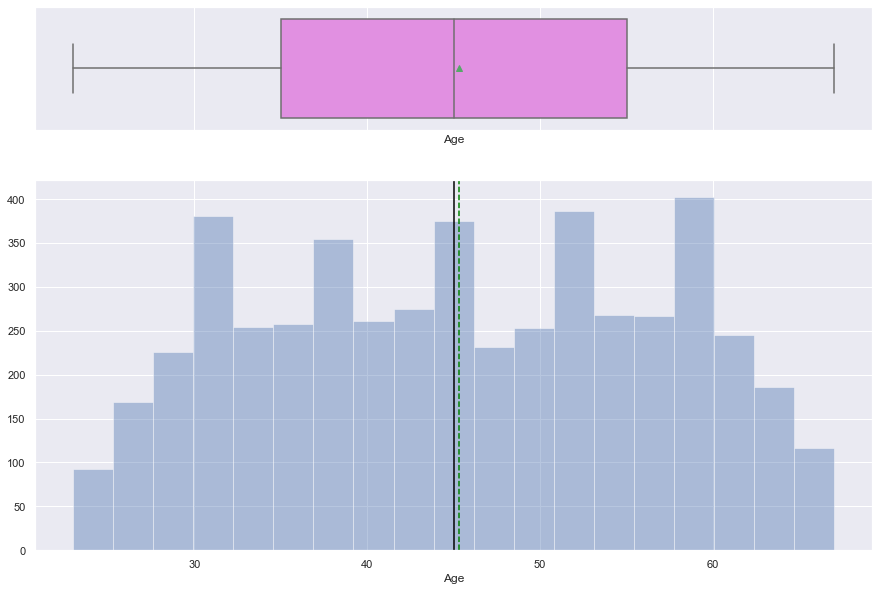

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df["Age"])

* Age seems to be normally distributed, and it has not outliers.


#### Experience

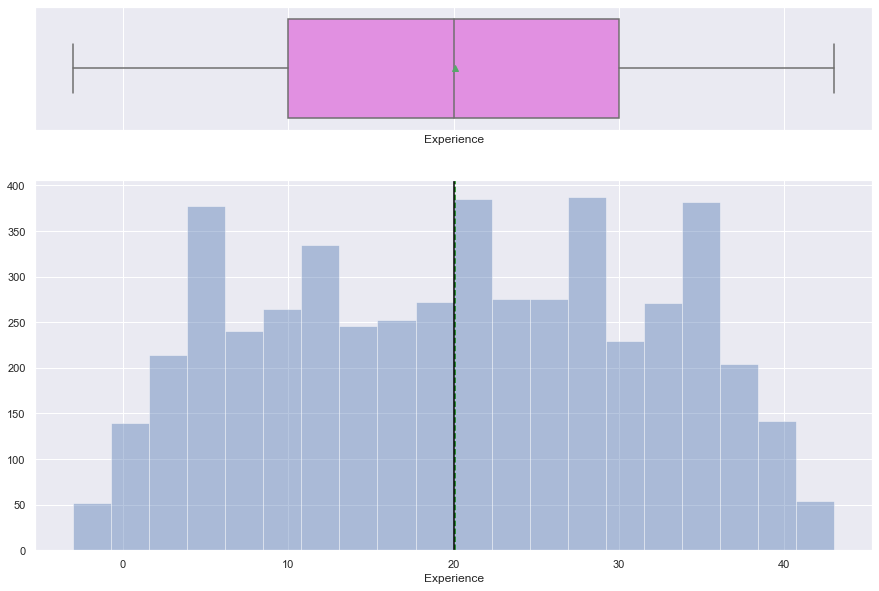

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df.Experience)

* Experience too appears to be normally distributed. There are no outliers


#### Income

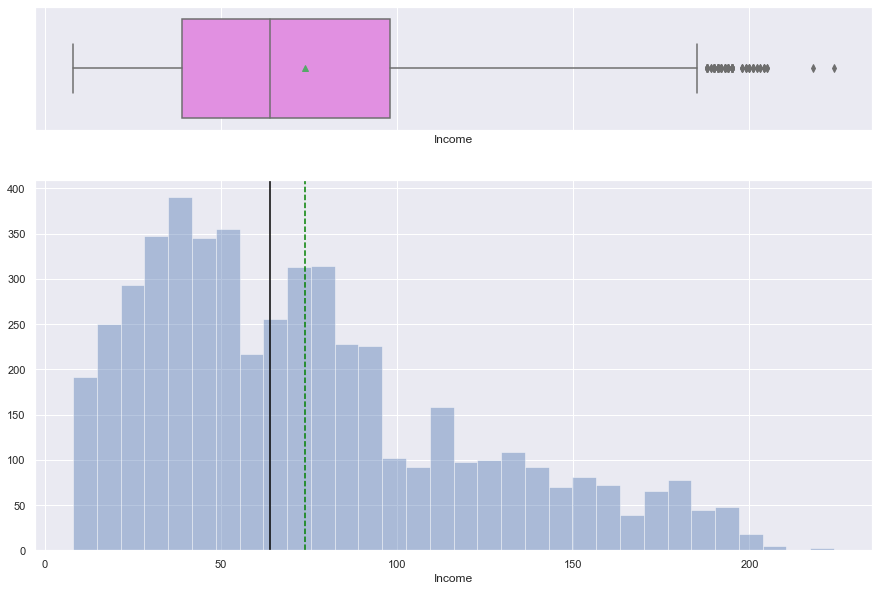

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df.Income)

- Income is right skewed.
- There are outliers on the upper limits in this column


#### CCAvg

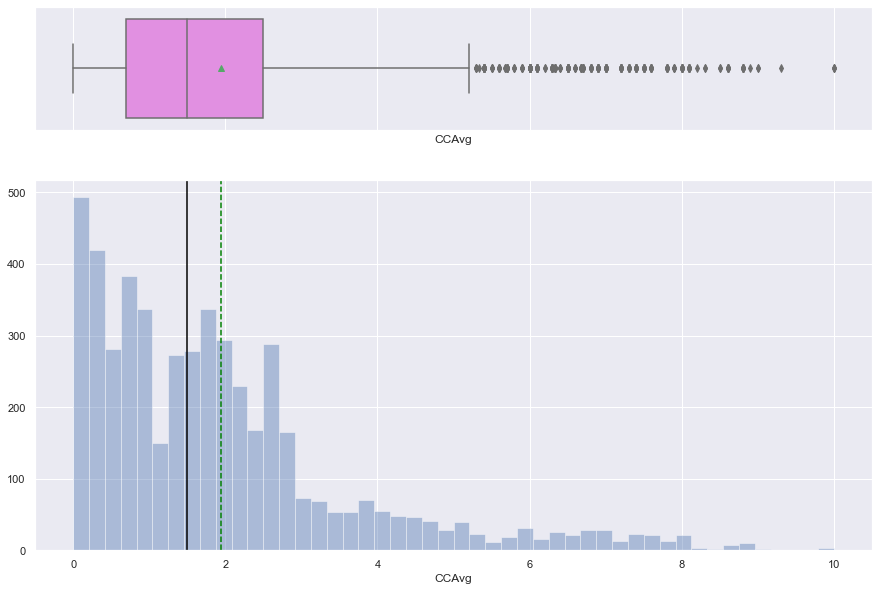

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df.CCAvg)

- CCAvg is also skewed to the right.
- Additonally, there are outliers on the upper limits in this column too.


#### Mortgage

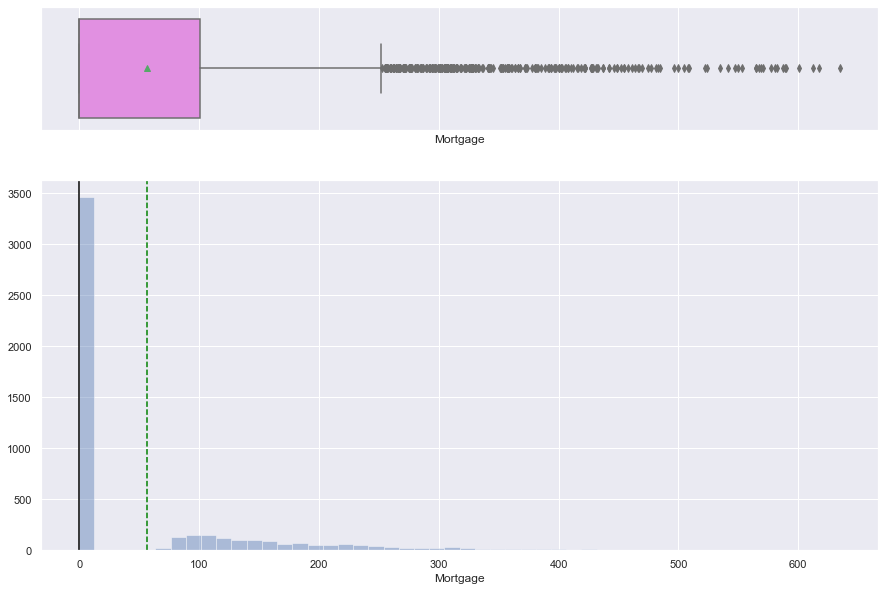

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df.Mortgage)

- The data in this column is very skewed to the right.
- There are also outliers in the data.
- Also was earlier identified, there are a lot of customers visiting the bank without mortgages 



*NB:* *Because of the distribution and nature of the other columns, other plots will be used instead of boxplots and histograms for a better understanding*

In [17]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(10, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Family

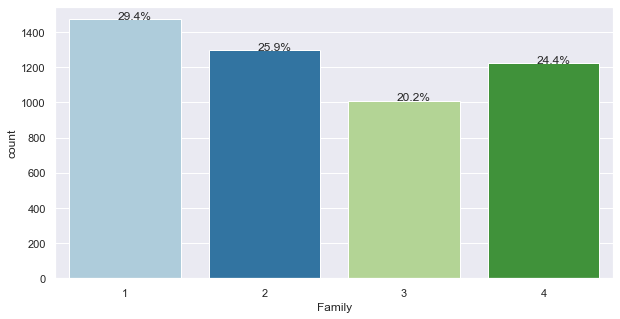

<IPython.core.display.Javascript object>

In [18]:
perc_on_bar(df, "Family")

- Majority of the clients (29.4%) visiting the bank have 1 family member.
- 3 family members is the least number of family members at 20.2% of all customers visiting the bank.

#### Education

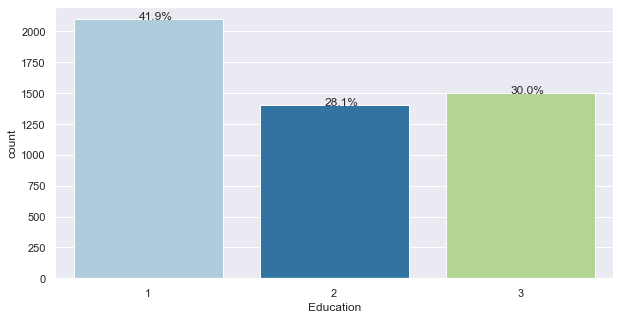

<IPython.core.display.Javascript object>

In [19]:
perc_on_bar(df, "Education")

- There are more undergraduates 41.9% than graduate at 28.1% and Advanced/professional at 30% visiting the bank

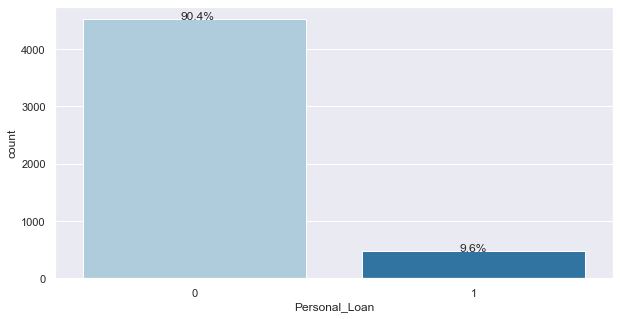

<IPython.core.display.Javascript object>

In [20]:
perc_on_bar(df, "Personal_Loan")

- 90.4% of the customers visiting the bank do not have a personal loan. This is an opportunity for the bank to make sales.


#### Securities_Account

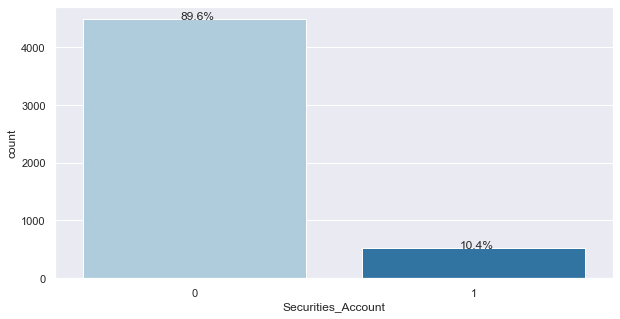

<IPython.core.display.Javascript object>

In [21]:
perc_on_bar(df, "Securities_Account")

- ~90% of the customers do not have a securities account with the bank. This too is a business opportunity for the bank.

#### CD_Account

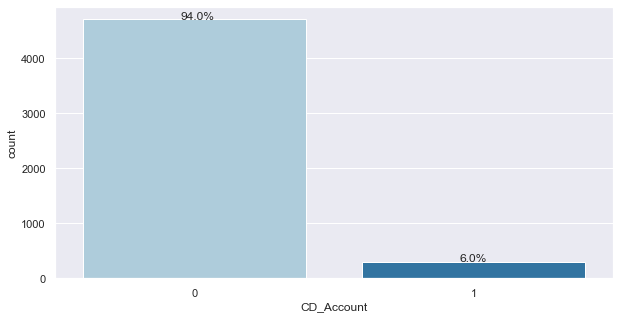

<IPython.core.display.Javascript object>

In [22]:
perc_on_bar(df, "CD_Account")

- 94% of the customers in the bank do not have a certificate of deposit account with the bank. This too is an opportunity for the bank.


#### Online

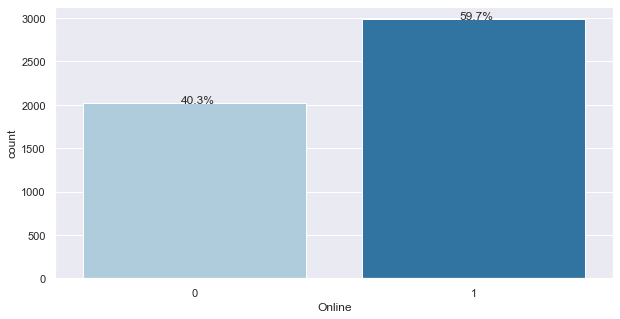

<IPython.core.display.Javascript object>

In [23]:
perc_on_bar(df, "Online")

- ~60% of the customers use online banking facilities. The bank can capitalize on this.


#### Credit Card

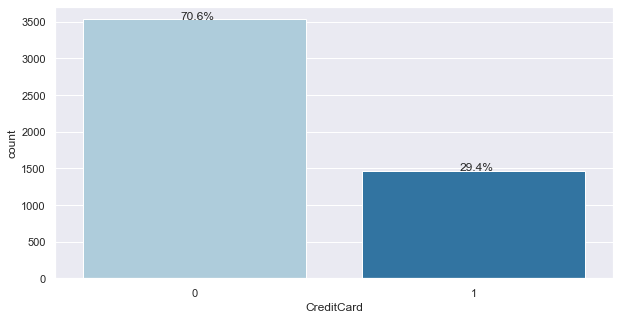

<IPython.core.display.Javascript object>

In [24]:
perc_on_bar(df, "CreditCard")

- ~71% of the customers do not have credit cards. This is an opportunity for the bank to market their credit cards.

### Bivariate Analysis

In [25]:
df.corr()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


<IPython.core.display.Javascript object>

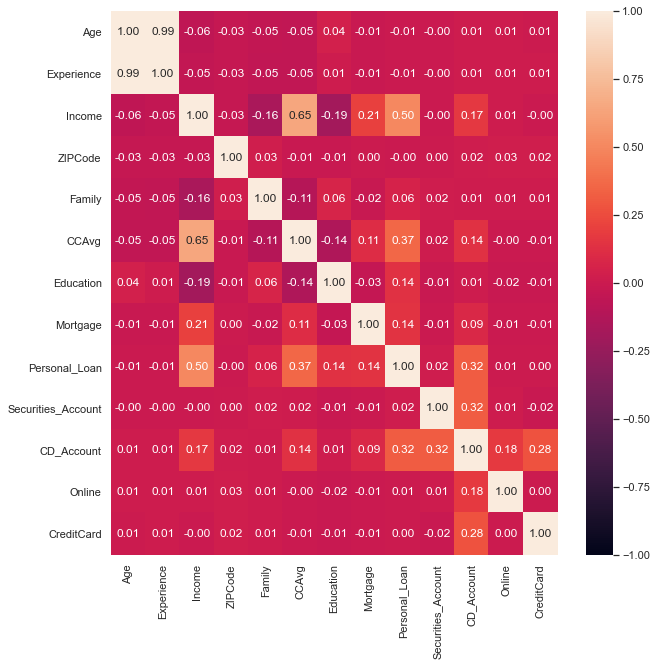

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

- Noticeably, Age and Experience have very strong positive correlation.
- Income too has a strong correlation with Personal_Loan and CCAvg
- Moderate positive correlation can be observed between CD_Account and CreditCard, Securities_Account and Personal_Loan
- There is also moderate positive correlation between CCAvg and Personal_Loan
- Otherwise there isn't a significant correlation among the other variables.

The relation between the variables can be visualized further as shown below.

#### Personal_Loan vs Family

In [27]:
## Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, df["Personal_Loan"], margins=True).sort_values(
        by=True, ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, df["Personal_Loan"], normalize="index").sort_values(
        by=1, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


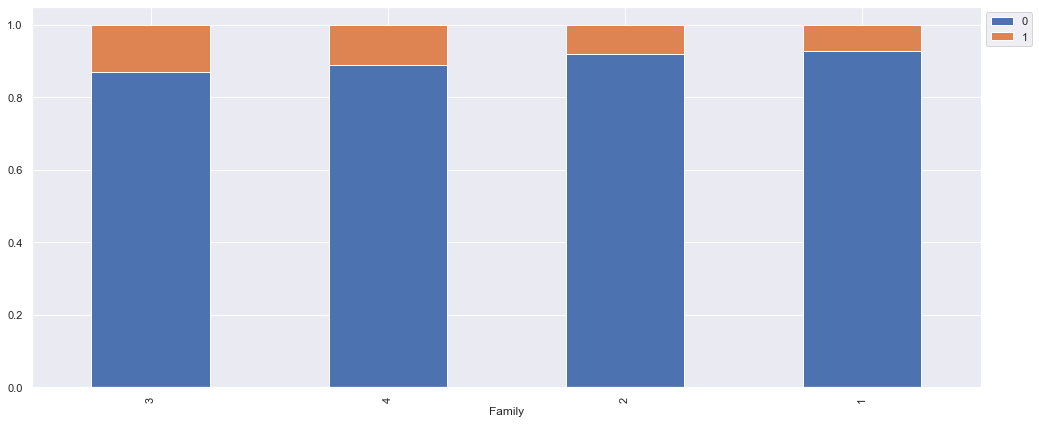

<IPython.core.display.Javascript object>

In [28]:
stacked_plot(df.Family)

- All family sizes appear to be performing similarly on matters of having a personal_loan or not. All sizes have a majority of them not having personal loans


#### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


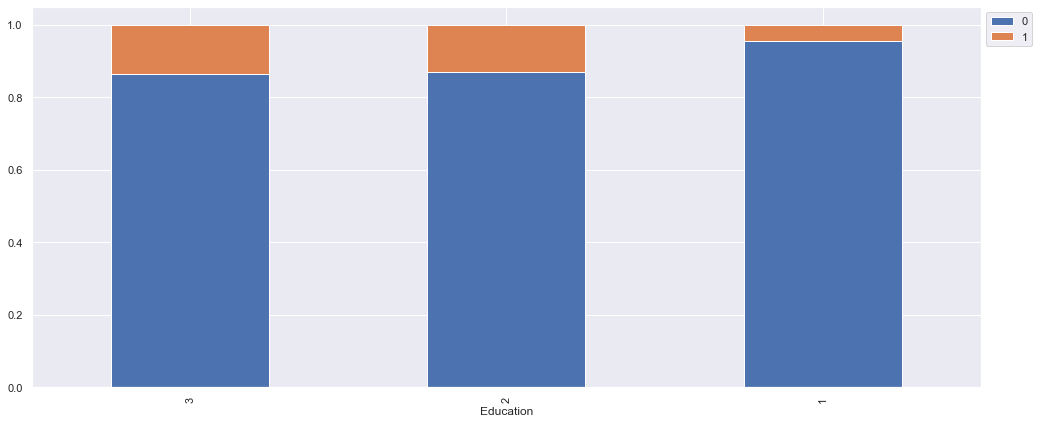

<IPython.core.display.Javascript object>

In [29]:
stacked_plot(df.Education)

- It appears that slightly less undergraduates have personal loans in comparison to customers with other education levels. The bank could target them to sell personal loans to them to increase their customer base.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


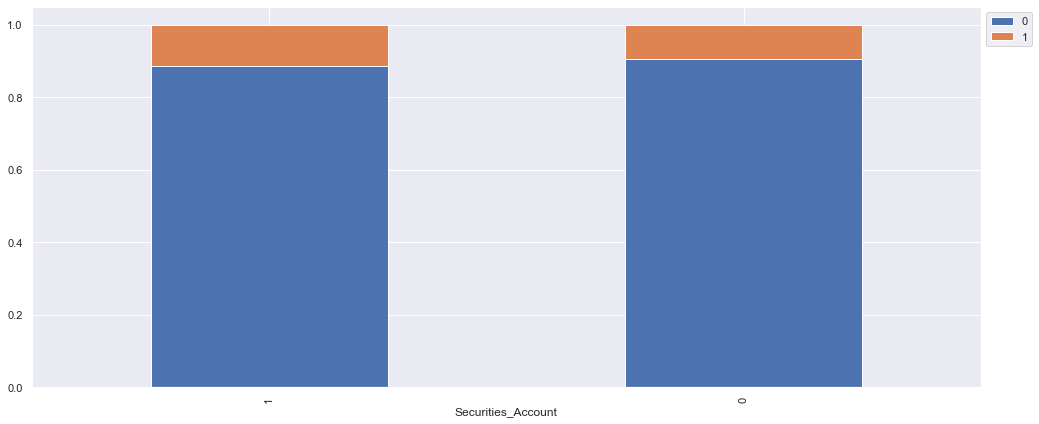

<IPython.core.display.Javascript object>

In [30]:
stacked_plot(df.Securities_Account)

- The plot indicates that the high number of people without personal loans is comparable to the high number without securities accounts with the bank.


#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


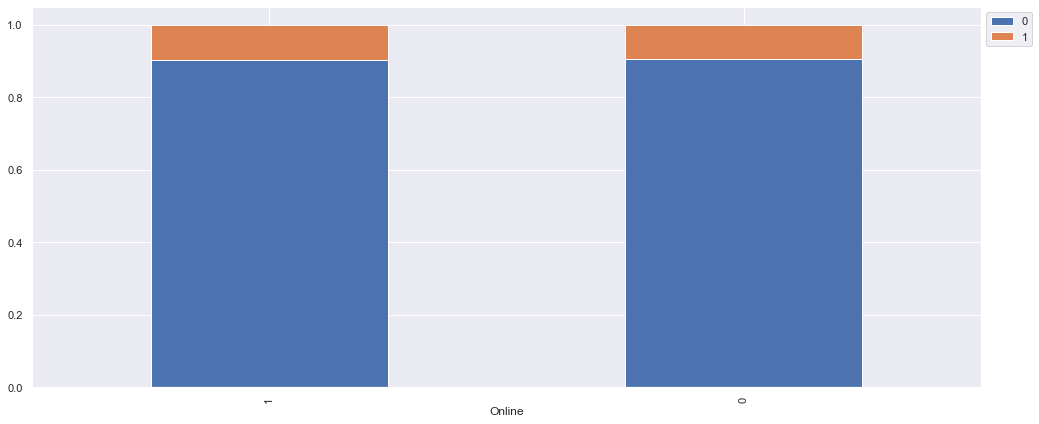

<IPython.core.display.Javascript object>

In [31]:
stacked_plot(df.Online)

- SImilar behavior observed with the securities account is also observed with customers conducting online bank transactions.


#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


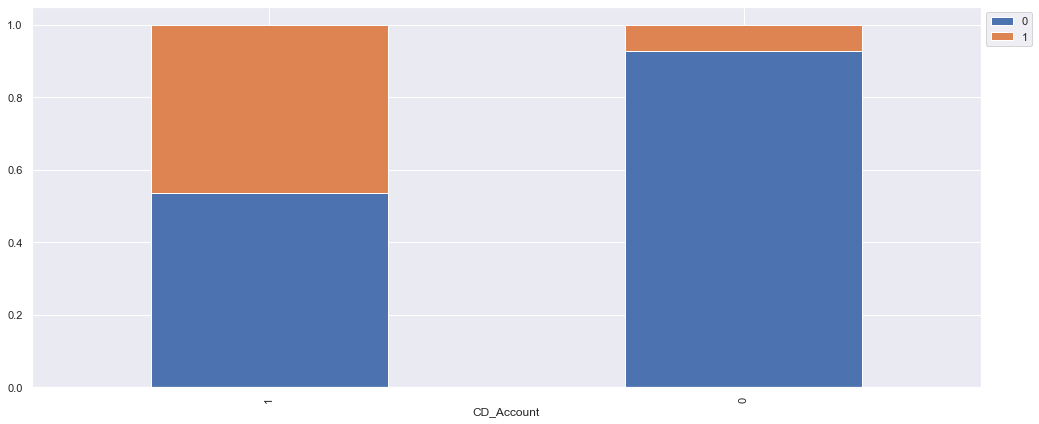

<IPython.core.display.Javascript object>

In [32]:
stacked_plot(df.CD_Account)

- Contrary to many of the previous observations, about a half of the people with a personal loan also had a CD_Account with the bank. Observations with lack of a personal loan still hold true with lack of a CD_Account and other variables observed thus far.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


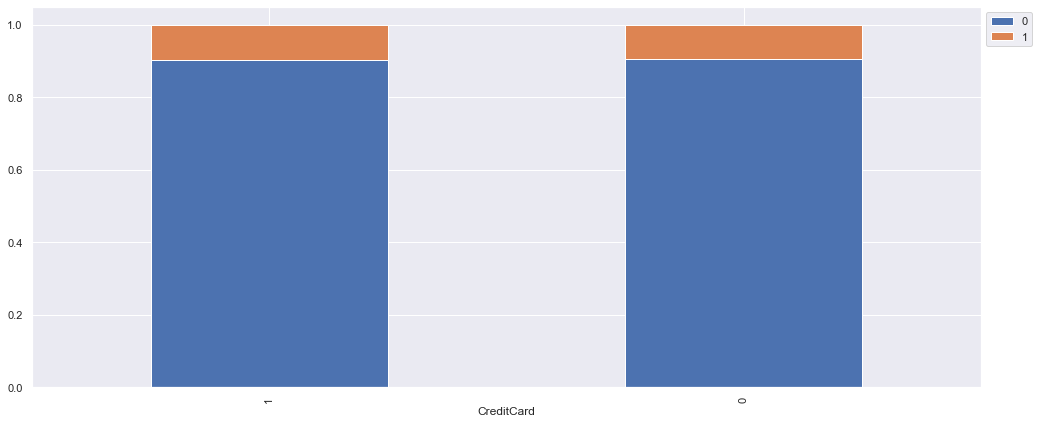

<IPython.core.display.Javascript object>

In [33]:
stacked_plot(df.CreditCard)

- As one would likely guess, people without personal loans probably do not use credit cards. Maybe these customers view debt as a bad thing.



- The other columns with continous and more than 4 unique values did not have clear visualizations with the stacked plots, hence they will be analyzed with boxplots below.

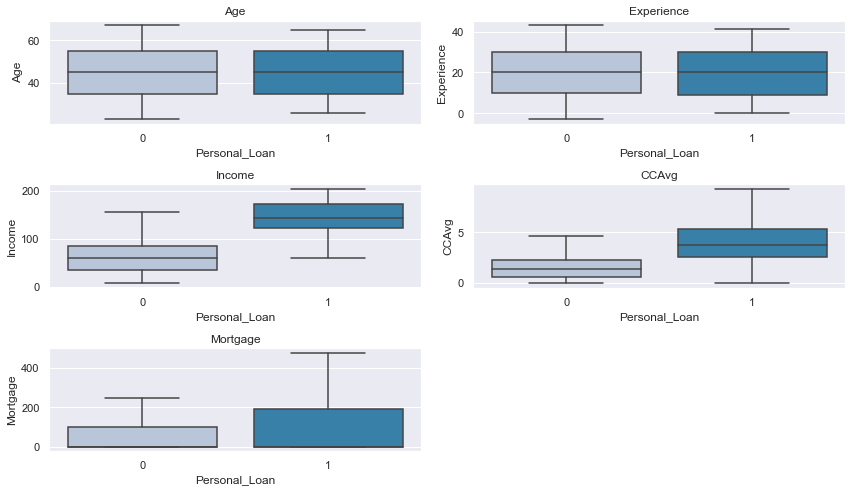

<IPython.core.display.Javascript object>

In [34]:
cols = df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Personal_Loan"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Being older or having more experience does not seem to have an impact on whether someone has a personal loan or not.
- However, having a higher income, higher CCAvg, annd a mortgage seem to slightly increase chances of someone having a personal loan.

### Data Pre-Processing/ Feature Transformation

To deal with the negative values (3) in the experience column, they will be converted to positive integers. This should not affect the dataset.

In [35]:
df.Experience = df["Experience"].replace(-1, 1)
df.Experience = df["Experience"].replace(-2, 2)
df.Experience = df["Experience"].replace(-3, 3)

df[df["Experience"] == -1 | -2 | -3]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


<IPython.core.display.Javascript object>

- There are no more negative values in the experience column.

#### Binning Education

In [36]:
df["Education_level"] = pd.cut(
    df["Education"],
    bins=[0, 1, 2, 3],
    labels=["Undergrad", "Graduate", "Advanced/Professional"],
)

df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level
1517,52,26,45,92697,4,1.8,1,0,0,0,0,1,0,Undergrad
228,47,22,53,92677,4,1.9,3,98,0,1,1,0,1,Advanced/Professional
2518,61,37,50,95125,4,1.3,2,0,0,0,0,0,1,Graduate
4404,29,5,34,94301,1,0.4,3,0,0,0,0,0,0,Advanced/Professional
4321,27,0,34,92717,1,2.0,2,112,0,0,0,0,1,Graduate


<IPython.core.display.Javascript object>

In [37]:
df.Education_level.value_counts()

Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education_level, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
!pip install uszipcode

<IPython.core.display.Javascript object>

In [39]:
from uszipcode import SearchEngine

search = SearchEngine()

zipcode = search.by_zipcode("11001")
zipcode.major_city

'Floral Park'

<IPython.core.display.Javascript object>

In [40]:
majorcounty = []

for i in np.arange(0, len(df["ZIPCode"])):
    zipcode = search.by_zipcode(
        df["ZIPCode"][i]
    )  # note to self. Avoid putting a comma before [i]
    majorcounty.append(zipcode.county)

<IPython.core.display.Javascript object>

In [41]:
df["CA_county"] = majorcounty

df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level,CA_county
2998,61,35,38,93106,2,0.3,1,0,0,0,0,0,0,Undergrad,Santa Barbara County
2677,32,8,70,91423,3,1.5,1,0,0,0,0,1,0,Undergrad,Los Angeles County
3040,28,2,33,95814,3,1.0,1,167,0,0,0,1,0,Undergrad,Sacramento County
3862,60,34,64,94104,3,2.5,1,0,0,0,0,1,0,Undergrad,San Francisco County
2893,38,14,70,94022,4,2.0,3,0,0,0,0,1,0,Advanced/Professional,Santa Clara County


<IPython.core.display.Javascript object>

In [42]:
df.CA_county.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

<IPython.core.display.Javascript object>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  Education_level     5000 non-null   category
 14  CA_county           4966 non-null   object  
dtypes: category(1), float64(1), int64(12),

<IPython.core.display.Javascript object>

In [44]:
df[df.duplicated()].sum()

Age                   0.0
Experience            0.0
Income                0.0
ZIPCode               0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal_Loan         0.0
Securities_Account    0.0
CD_Account            0.0
Online                0.0
CreditCard            0.0
Education_level       0.0
CA_county             0.0
dtype: float64

<IPython.core.display.Javascript object>

In [45]:
df["CA_county"] = df["CA_county"].astype("category")

<IPython.core.display.Javascript object>

- Outliers have been purposely left in the data because one of the model used later is not affected by them, and also because of the feeling that removing some of the outliers might influence model performance in an unintended manner.

#### Data Preparation

In [46]:
# information under Education and Zipcodes is stored in Education_level and CA_county respectively.

df.drop(["Education", "ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [47]:
df2 = pd.get_dummies(
    df,
    columns=["Education_level", "CA_county"],
    drop_first=True,
)

df2.head(3)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level_Graduate,Education_level_Advanced/Professional,CA_county_Butte County,CA_county_Contra Costa County,CA_county_El Dorado County,CA_county_Fresno County,CA_county_Humboldt County,CA_county_Imperial County,CA_county_Kern County,CA_county_Lake County,CA_county_Los Angeles County,CA_county_Marin County,CA_county_Mendocino County,CA_county_Merced County,CA_county_Monterey County,CA_county_Napa County,CA_county_Orange County,CA_county_Placer County,CA_county_Riverside County,CA_county_Sacramento County,CA_county_San Benito County,CA_county_San Bernardino County,CA_county_San Diego County,CA_county_San Francisco County,CA_county_San Joaquin County,CA_county_San Luis Obispo County,CA_county_San Mateo County,CA_county_Santa Barbara County,CA_county_Santa Clara County,CA_county_Santa Cruz County,CA_county_Shasta County,CA_county_Siskiyou County,CA_county_Solano County,CA_county_Sonoma County,CA_county_Stanislaus County,CA_county_Trinity County,CA_county_Tuolumne County,CA_county_Ventura County,CA_county_Yolo County
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Model Building

In [48]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


<IPython.core.display.Javascript object>

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = df2.drop(["Personal_Loan"], axis=1)
Y = df2[["Personal_Loan"]]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [51]:
def get_metrics_score(
    model, library, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library
    model: classifier to predict values of X
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results
    if library == "stats":
        score_list = []

        pred_train = model.predict(train) > threshold
        pred_test = model.predict(test) > threshold

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)

        train_acc = accuracy_score(pred_train, train_y)
        test_acc = accuracy_score(pred_test, test_y)

        train_recall = recall_score(train_y, pred_train)
        test_recall = recall_score(test_y, pred_test)

        train_precision = precision_score(train_y, pred_train)
        test_precision = precision_score(test_y, pred_test)

        train_f1 = f1_score(train_y, pred_train)
        test_f1 = f1_score(test_y, pred_test)

        score_list.extend(
            (
                train_acc,
                test_acc,
                train_recall,
                test_recall,
                train_precision,
                test_precision,
                train_f1,
                test_f1,
            )
        )

    elif library == "sklearn":
        score_list = []

        pred_train = model.predict(train)
        pred_test = model.predict(test)

        train_acc = accuracy_score(pred_train, train_y)
        test_acc = accuracy_score(pred_test, test_y)

        train_recall = recall_score(train_y, pred_train)
        test_recall = recall_score(test_y, pred_test)

        train_precision = precision_score(train_y, pred_train)
        test_precision = precision_score(test_y, pred_test)

        train_f1 = f1_score(train_y, pred_train)
        test_f1 = f1_score(test_y, pred_test)

        score_list.extend(
            (
                train_acc,
                test_acc,
                train_recall,
                test_recall,
                train_precision,
                test_precision,
                train_f1,
                test_f1,
            )
        )

    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [52]:
def make_confusion_matrix(
    model, library, test_X, y_actual, threshold=0.5, labels=[1, 0]
):
    """
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library
    test_X: test set
    y_actual : ground truth
    threshold: thresold for classifiying the observation as 1

    """

    if library == "sklearn":
        y_predict = model.predict(test_X)
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual - yes", "Actual - no"]],
            columns=[i for i in ["Predicted - yes", "Predicted - no"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

    elif library == "stats":
        y_predict = model.predict(test_X) > threshold
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual - yes", "Actual - no"]],
            columns=[i for i in ["Predicted - yes", "Predicted - no"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression with Sklearn Library

Accuracy on training set :  0.9585714285714285
Accuracy on test set :  0.9513333333333334
Recall on training set :  0.6646525679758308
Recall on test set :  0.5973154362416108
Precision on training set :  0.8661417322834646
Precision on test set :  0.8725490196078431
F1 on training set :  0.7521367521367521
F1 on test set :  0.7091633466135459


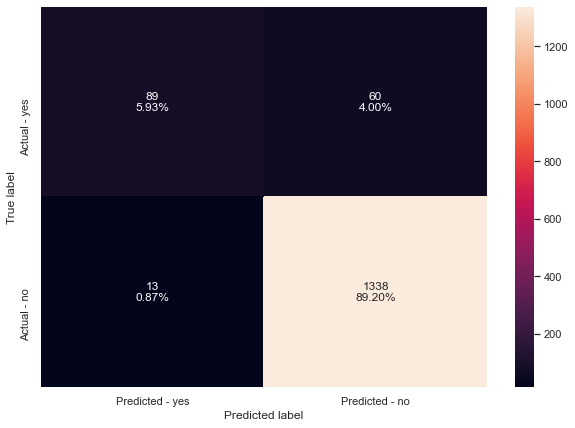

<IPython.core.display.Javascript object>

In [53]:
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# confusion matrix

make_confusion_matrix(lr,'sklearn',X_test,y_test)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,'sklearn',X_train,X_test,y_train,y_test)


In [54]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

<IPython.core.display.Javascript object>

In [55]:
vif_series1 = pd.Series(
    [
        variance_inflation_factor(X_train_num.values, i)
        for i in range(X_train_num.shape[1])
    ],
    index=X_train_num.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                                    459.714081
Age                                       92.086137
Experience                                92.020849
Income                                     1.910794
Family                                     1.057655
CCAvg                                      1.759506
Mortgage                                   1.060434
Securities_Account                         1.155389
CD_Account                                 1.368179
Online                                     1.055745
CreditCard                                 1.123834
Education_level_Graduate                   1.306010
Education_level_Advanced/Professional      1.340905
CA_county_Butte County                     1.033524
CA_county_Contra Costa County              1.130471
CA_county_El Dorado County                 1.026716
CA_county_Fresno County                    1.032583
CA_county_Humboldt County                  1.059329
CA_county_Imperial County    

<IPython.core.display.Javascript object>

- Age and Experience have high VIF scores. They will be dealt with in the subsequent sections after checking how the model performs with the stats library.

### Logistic Regression with Stats Library

In [56]:
# logit = sm.Logit(y_train, X_train.astype(float))
# lg = logit.fit(warn_convergence=False)

# # Let's check model performances for this model
# scores_LR = get_metrics_score(lg, "stats", X_train, X_test, y_train, y_test)

<IPython.core.display.Javascript object>

- Running the code above gives a "singular matrix" error. Some of the reasons for that could be that the intercept has not been encoded into 1s and 0s, or there is a high correlation in some of the variables. Both of these factors are checked below.

In [57]:
df2.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

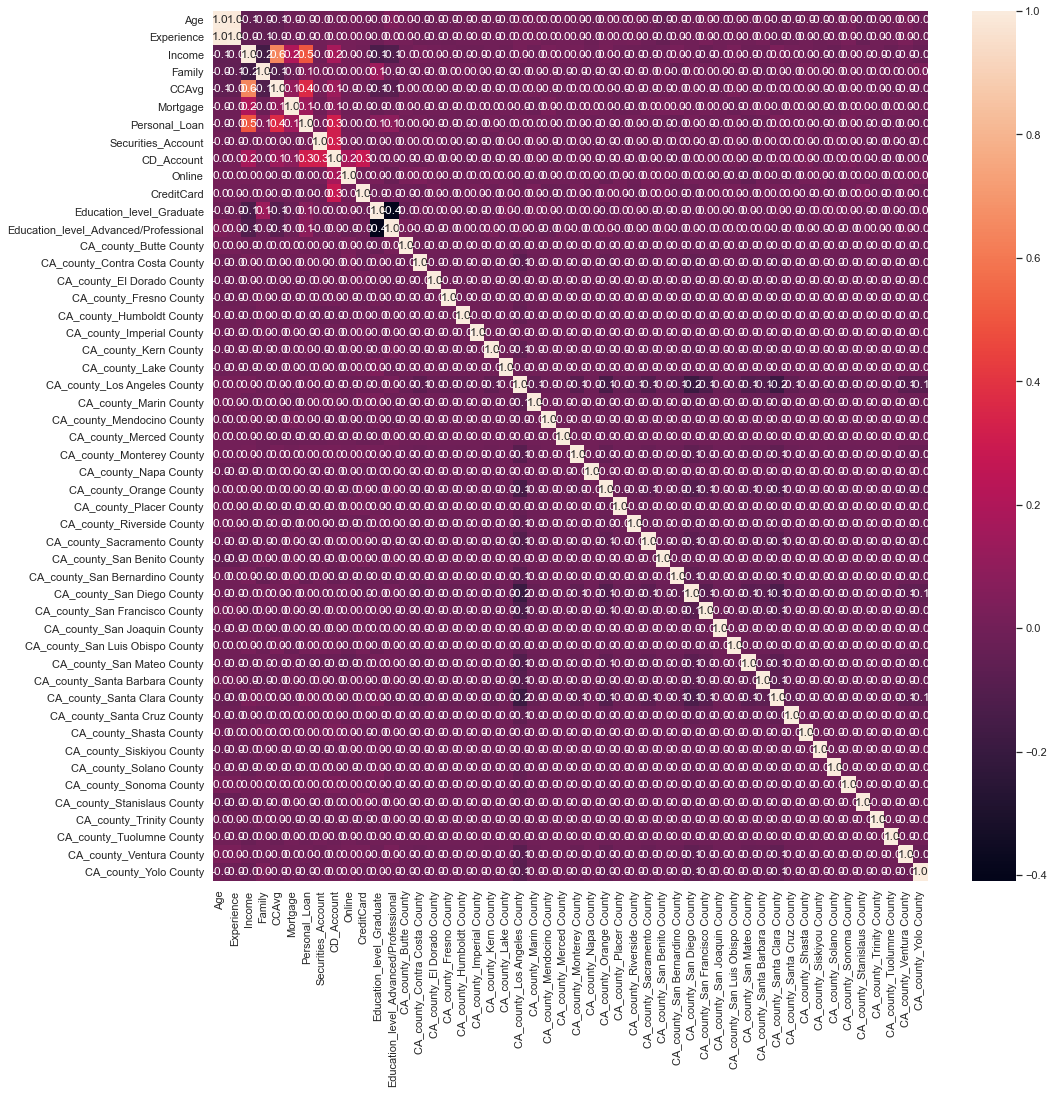

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(16, 16))
sns.heatmap(df2.corr(), annot=True, fmt=".1f")
plt.show()

In [59]:
# df2.drop(["Experience", "Age"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [60]:
X = df2.drop(["Personal_Loan"], axis=1)
Y = df2[["Personal_Loan"]]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

#### Removing Age

In [62]:
X_train_num1 = X_train_num.drop("Age", axis=1)
vif_series2 = pd.Series(
    [
        variance_inflation_factor(X_train_num1.values, i)
        for i in range(X_train_num1.shape[1])
    ],
    index=X_train_num1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                    25.819860
Experience                                1.022432
Income                                    1.906068
Family                                    1.057331
CCAvg                                     1.755216
Mortgage                                  1.060412
Securities_Account                        1.155160
CD_Account                                1.367678
Online                                    1.055663
CreditCard                                1.123800
Education_level_Graduate                  1.292525
Education_level_Advanced/Professional     1.263753
CA_county_Butte County                    1.033249
CA_county_Contra Costa County             1.130408
CA_county_El Dorado County                1.026626
CA_county_Fresno County                   1.032579
CA_county_Humboldt County                 1.058694
CA_county_Imperial County                 1.006312
CA_county_Kern County                     1.087

<IPython.core.display.Javascript object>

- Removing Age resolved the issue with the VIF scores. Next we'll try to fit the model without it to check it's performance.

In [63]:
X_train.drop(["Age"], axis=1, inplace=True)
X_test.drop(["Age"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [64]:
# logit = sm.Logit(y_train, X_train.astype(float))
# lg = logit.fit(warn_convergence=False)

# # Let's check model performances for this model
# scores_LR = get_metrics_score(lg, "stats", X_train, X_test, y_train, y_test)

<IPython.core.display.Javascript object>

- It appears dropping "Age" alone did not resolve the "singular matrix" issue. Next we drop Experience and try and fit the model.

In [65]:
X_train.drop(["Experience"], axis=1, inplace=True)
X_test.drop(["Experience"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [66]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence=False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg, "stats", X_train, X_test, y_train, y_test)

         Current function value: 0.110297
         Iterations: 35
Accuracy on training set :  0.96
Accuracy on test set :  0.9553333333333334
Recall on training set :  0.676737160120846
Recall on test set :  0.6375838926174496
Precision on training set :  0.8715953307392996
Precision on test set :  0.8796296296296297
F1 on training set :  0.7619047619047619
F1 on test set :  0.7392996108949416


<IPython.core.display.Javascript object>

- "Singular Matrix" error resolved.

In [67]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3452
Method:                           MLE   Df Model:                           47
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.6476
Time:                        03:04:55   Log-Likelihood:                -386.04
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.150e-266
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -13.5850      0.797    -17.052      0.000     -15.147     -12.024
Income                                    0.0606      0.004     16.231      0.000       0.053       0.068
Family                                    0.6883      0.099      6.934      0.000       0.494       0.883
CCAvg                                     0.2068      0.056      3.704      0.000       0.097       0.316
Mortgage                                  0.0011      0.001      1.487      0.137      -0.000       0.003
Securities_Account                       -1.2271      0.416     -2.947      0.003      -2.043      -0.411
CD_Account                                3.9993      0.445      8.986      0.000       3.127       4.872
Online                                   -0.7166      0.206     -3.472      0.001      -1.121      -0.312
CreditCard                               -1.2120      0.273     -4.440      0.000      -1.747      -0.677
Education_level_Graduate                  3.9155      0.334     11.731      0.000       3.261       4.570
Education_level_Advanced/Professional     4.0570      0.328     12.375      0.000       3.414       4.700
CA_county_Butte County                  -20.9873   9.28e+04     -0.000      1.000   -1.82e+05    1.82e+05
CA_county_Contra Costa County             0.5298      0.750      0.706      0.480      -0.941       2.001
CA_county_El Dorado County               -0.1996      1.386     -0.144      0.885      -2.915       2.516
CA_county_Fresno County                  -1.1386      2.659     -0.428      0.668      -6.349       4.072
CA_county_Humboldt County                -1.4507      1.768     -0.821      0.412      -4.915       2.014
CA_county_Imperial County               -15.5372   2.54e+04     -0.001      1.000   -4.98e+04    4.98e+04
CA_county_Kern County                     1.2064      0.775      1.556      0.120      -0.313       2.726
CA_county_Lake County                   -14.7388   1.32e+04     -0.001      0.999   -2.59e+04    2.58e+04
CA_county_Los Angeles County              0.0590      0.356      0.166      0.868      -0.639       0.757
CA_county_Marin County                    0.6529      0.920      0.710      0.478      -1.150       2.456
CA_county_Mendocino County               -1.5326      3.339     -0.459      0.646      -8.077       5.012
CA_county_Merced County                -382.3390   1.81e+83  -2.11e-81      1.000   -3.55e+83    3.55e+83
CA_county_Monterey County                 0.1649      0.664      0.248      0.804      -1.136       1.466
CA_county_Napa County                   -14.2343   1.81e+04     -0.001      0.999   -3.56e+04    3.55e+04
CA_county_Orange County                   0.1953      0.465      0.420      0.675      -0.717       1.107
CA_county_Placer County                   1.1845      1.021      1.160      0.246      -0.816       3.185
CA_county_Riverside County                1.9111      0.791  

<IPython.core.display.Javascript object>

- The above model summary indicates that Mortgage, and a majority of the counties have high p-values. That means, they can be dropped for further analysis if need be.

In [68]:
X_train2 = X_train.drop(["Mortgage"], axis=1)
X_test2 = X_test.drop(["Mortgage"], axis=1)

logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(warn_convergence=False)

print(lg2.summary())

         Current function value: 0.133004
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                           46
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.5751
Time:                        03:04:55   Log-Likelihood:                -465.51
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.276e-234
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -13.5441      0.794    -17.055      0.000     -15.

<IPython.core.display.Javascript object>

- CA_county generally not statistically significant. Those attributes can therefore be removed and/ ignored.

In [69]:
df2.shape

(5000, 50)

<IPython.core.display.Javascript object>

In [70]:
df2.head(1)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level_Graduate,Education_level_Advanced/Professional,CA_county_Butte County,CA_county_Contra Costa County,CA_county_El Dorado County,CA_county_Fresno County,CA_county_Humboldt County,CA_county_Imperial County,CA_county_Kern County,CA_county_Lake County,CA_county_Los Angeles County,CA_county_Marin County,CA_county_Mendocino County,CA_county_Merced County,CA_county_Monterey County,CA_county_Napa County,CA_county_Orange County,CA_county_Placer County,CA_county_Riverside County,CA_county_Sacramento County,CA_county_San Benito County,CA_county_San Bernardino County,CA_county_San Diego County,CA_county_San Francisco County,CA_county_San Joaquin County,CA_county_San Luis Obispo County,CA_county_San Mateo County,CA_county_Santa Barbara County,CA_county_Santa Clara County,CA_county_Santa Cruz County,CA_county_Shasta County,CA_county_Siskiyou County,CA_county_Solano County,CA_county_Sonoma County,CA_county_Stanislaus County,CA_county_Trinity County,CA_county_Tuolumne County,CA_county_Ventura County,CA_county_Yolo County
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [71]:
X_train.columns

Index(['const', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Education_level_Graduate',
       'Education_level_Advanced/Professional', 'CA_county_Butte County',
       'CA_county_Contra Costa County', 'CA_county_El Dorado County',
       'CA_county_Fresno County', 'CA_county_Humboldt County',
       'CA_county_Imperial County', 'CA_county_Kern County',
       'CA_county_Lake County', 'CA_county_Los Angeles County',
       'CA_county_Marin County', 'CA_county_Mendocino County',
       'CA_county_Merced County', 'CA_county_Monterey County',
       'CA_county_Napa County', 'CA_county_Orange County',
       'CA_county_Placer County', 'CA_county_Riverside County',
       'CA_county_Sacramento County', 'CA_county_San Benito County',
       'CA_county_San Bernardino County', 'CA_county_San Diego County',
       'CA_county_San Francisco County', 'CA_county_San Joaquin County',
       'CA_county_San Luis Obispo County', 'CA_county

<IPython.core.display.Javascript object>

In [72]:
# Dropping columns based on the index


X_train3 = X_train2.drop(
    X_train2.loc[:, "CA_county_Butte County":"CA_county_Yolo County"].columns, axis=1
)
X_test3 = X_test2.drop(
    X_test2.loc[:, "CA_county_Butte County":"CA_county_Yolo County"].columns, axis=1
)
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(warn_convergence=False)

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.114420
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.6344
Time:                        03:04:55   Log-Likelihood:                -400.47
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.131e-293
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -13.1295      

<IPython.core.display.Javascript object>

- Model lg3 will be used going forward.
- All remaining variables are significant. Next we'll check the VIF scores and model performance.

#### Checking for Multicollinearity

In [73]:
# changing datatype of colums to numeric for checking vif
X_train_num3 = X_train3.astype(float).copy()

<IPython.core.display.Javascript object>

In [74]:
vif_series3 = pd.Series(
    [
        variance_inflation_factor(X_train_num3.values, i)
        for i in range(X_train_num3.shape[1])
    ],
    index=X_train_num3.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                                    13.387244
Income                                    1.827420
Family                                    1.042193
CCAvg                                     1.729358
Securities_Account                        1.143872
CD_Account                                1.349449
Online                                    1.040582
CreditCard                                1.109211
Education_level_Graduate                  1.275015
Education_level_Advanced/Professional     1.256701
dtype: float64



<IPython.core.display.Javascript object>

- There is no multicollinearity

Accuracy on training set :  0.9588571428571429
Accuracy on test set :  0.9586666666666667
Recall on training set :  0.676737160120846
Recall on test set :  0.6577181208053692
Precision on training set :  0.8582375478927203
Precision on test set :  0.8990825688073395
F1 on training set :  0.7567567567567568
F1 on test set :  0.7596899224806203


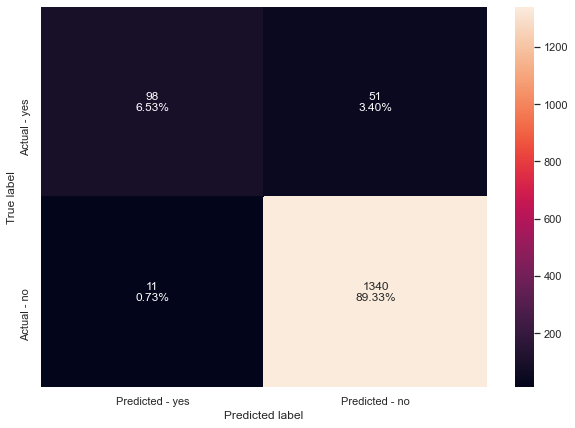

<IPython.core.display.Javascript object>

In [75]:
# Check model performance

# confusion matrix
make_confusion_matrix(lg3, "stats", X_test3, y_test)

# metrics
scores_LR = get_metrics_score(lg3, "stats", X_train3, X_test3, y_train, y_test)

- In comparison to the earlier metrics, Recall and F1 have improved in the new model. The number could however be higher.
- Next we check the ROC and AUC to understand model performance and see areas of improving the model.


### Area Under the Curve - Receiver Operating Characteristics

#### AUC-ROC metrics on training set

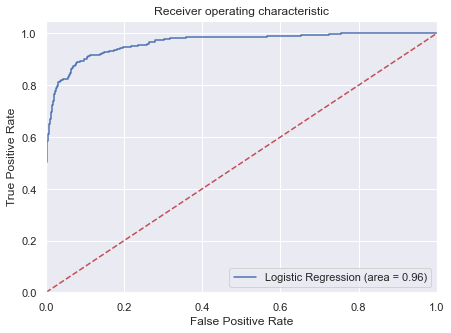

<IPython.core.display.Javascript object>

In [76]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- AUC is 0.96 which indicates that the model is doing a good job at measuring the separation between the classes.

#### AUC-ROC Metrics on the Test set

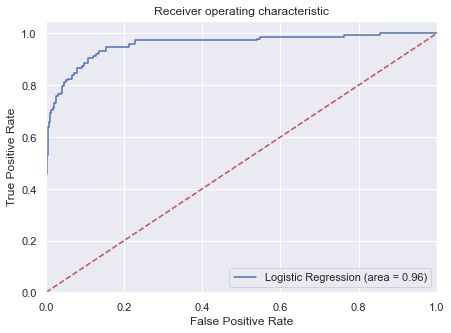

<IPython.core.display.Javascript object>

In [77]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The model is still showing an almost ideal measure of class separability

#### Interpreting the model coefficients.

- Under the lg3 model summary, one sees that there are both positive and negative values. For the positive values, e.g., income, family, CCAvg, CD_Account, and Education_Level, an increase of those variables corresponds to an increase with chances of purchasing a personal loan. Education_level seems the most important factor with coefficients of ~3.9
- On the other hand, an increase of the variables with the negative values, such as, securities, online, and credit card, correspond to a decrease with chances of purchasing a personal loan.Having a seccurities account and a credit card seem to be directly inversely proportional to getting a personal loan, with coefficient values of approx -1.
- To understand the above statements better, one can convert the coefficients to odds and percentages to understand the impact.


- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100

#### Getting odds from coefficients

In [78]:
odds = np.exp(lg3.params)  # converting coefficients to odds
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    odds, X_train3.columns, columns=["odds"]
).T  # adding the odds to a dataframe

,const,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_level_Graduate,Education_level_Advanced/Professional
odds,0.000002,1.061114,1.912515,1.221683,0.31768,47.393495,0.514827,0.342353,48.460596,55.087516


<IPython.core.display.Javascript object>

#### Getting percentages from the odds

In [79]:
perc_change_odds = (np.exp(lg3.params) - 1) * 100  # finding the percentage change
pd.set_option("display.max_columns", None)
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

,const,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_level_Graduate,Education_level_Advanced/Professional
change_odds%,-99.999801,6.111416,91.251488,22.16825,-68.232001,4639.349472,-48.517268,-65.764679,4746.05958,5408.751567


<IPython.core.display.Javascript object>

- As the odds and percentages indicate, having a CD_Account and high education level increase the chances of one purchasing a personal loan by more than 4500%
- Using online banking facilities and having a Securities Account have the opposite effect by indicating a decrease on chances of purchasing a personal loan the more those variables increase.

- It was noted earlier that the metrics could be improved. The next steps attempt to improve them by tweaking the threshold

### Model Improvement

#### 1) Using ROC-AUC to find optimal threshold

In [80]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg3.predict(X_test3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07305286213110446


<IPython.core.display.Javascript object>

Accuracy on training set :  0.8857142857142857
Accuracy on test set :  0.8926666666666667
Recall on training set :  0.9154078549848943
Recall on test set :  0.8993288590604027
Precision on training set :  0.4488888888888889
Precision on test set :  0.4785714285714286
F1 on training set :  0.6023856858846919
F1 on test set :  0.6247086247086246
ROC-AUC Score on training set :  0.8990103332986952
ROC-AUC Score on test set :  0.8956303806774997


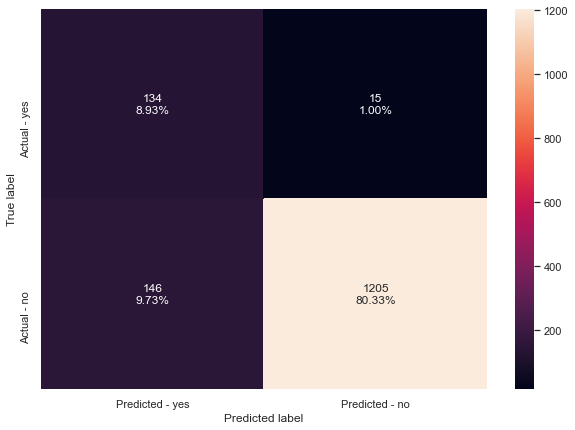

<IPython.core.display.Javascript object>

In [81]:
# confusion matrix
make_confusion_matrix(
    lg3, "stats", X_test3, y_test, threshold=optimal_threshold_auc_roc
)

# checking model performance
scores_LR = get_metrics_score(
    lg3,
    "stats",
    X_train3,
    X_test3,
    y_train,
    y_test,
    threshold=optimal_threshold_auc_roc,
    roc=True,
)

- The Accuracy has reduced a little bit, but recall has improved significantly from ~0.65 to ~0.90
- Precision and F1 scores have also reduced.
- ROC_AUC score of ~0.89 means that the model is able to correctly distinguish between classes 89% of the time.

#### 2) Threshold from Precision and Recall curve

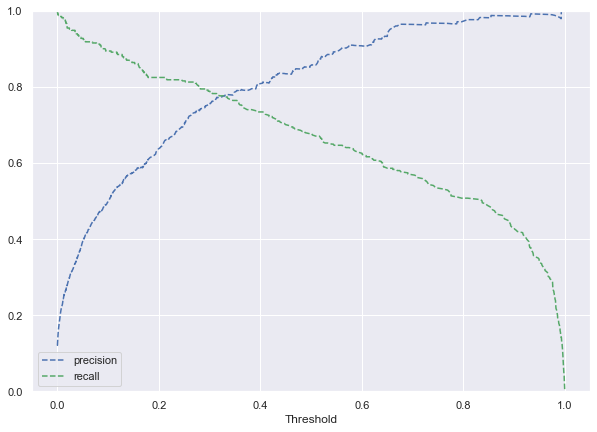

<IPython.core.display.Javascript object>

In [82]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [83]:
tre

array([4.99831974e-04, 5.00256848e-04, 5.01246199e-04, ...,
       9.99550675e-01, 9.99726592e-01, 9.99905979e-01])

<IPython.core.display.Javascript object>

Accuracy on training set :  0.9577142857142857
Accuracy on test set :  0.954
Recall on training set :  0.7734138972809668
Recall on test set :  0.7248322147651006
Precision on training set :  0.7781155015197568
Precision on test set :  0.7941176470588235
F1 on training set :  0.7757575757575759
F1 on test set :  0.7578947368421052
ROC-AUC Score on training set :  0.8751891196723546
ROC-AUC Score on test set :  0.8520534130820321


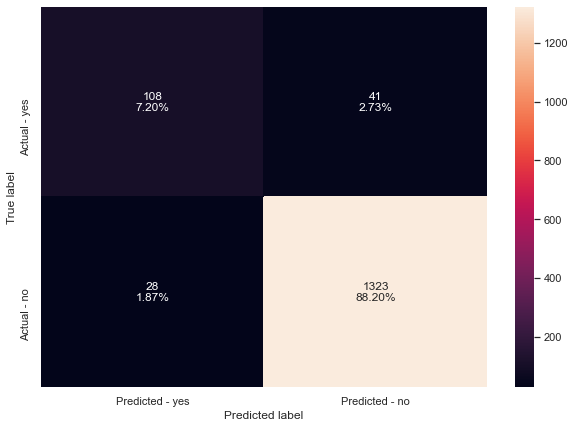

<IPython.core.display.Javascript object>

In [84]:
optimal_threshold_curve = 0.33

# confusion matrix
make_confusion_matrix(lg3, "stats", X_test3, y_test, threshold=optimal_threshold_curve)

# checking model performance
scores_LR = get_metrics_score(
    lg3,
    "stats",
    X_train3,
    X_test3,
    y_train,
    y_test,
    threshold=optimal_threshold_curve,
    roc=True,
)

- With the new threshold, Accuracy, Precision, and F1 scores increase. Recall and ROC score reduced. The new figures are also different from those of the original model with the default threshold as one can see below.

In [85]:
# checking model performance
scores_LR = get_metrics_score(
    lg3, "stats", X_train3, X_test3, y_train, y_test, threshold=0.5, roc=True
)

Accuracy on training set :  0.9588571428571429
Accuracy on test set :  0.9586666666666667
Recall on training set :  0.676737160120846
Recall on test set :  0.6577181208053692
Precision on training set :  0.8582375478927203
Precision on test set :  0.8990825688073395
F1 on training set :  0.7567567567567568
F1 on test set :  0.7596899224806203
ROC-AUC Score on training set :  0.8325307763368509
ROC-AUC Score on test set :  0.8247880019274811


<IPython.core.display.Javascript object>

- To summarize all the models, the outputs with be fed into a list, which is later converted to a DataFrame for easy readability. 

#### Model Summary

In [86]:
# defining list of model
models = [lg3]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:

    j = get_metrics_score(
        model, "stats", X_train3, X_test3, y_train, y_test, flag=False
    )
    k = get_metrics_score(
        model,
        "stats",
        X_train3,
        X_test3,
        y_train,
        y_test,
        threshold=optimal_threshold_auc_roc,
        flag=False,
    )
    l = get_metrics_score(
        model,
        "stats",
        X_train3,
        X_test3,
        y_train,
        y_test,
        threshold=optimal_threshold_curve,
        flag=False,
    )

    # intial logistic regression model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

    # logistic regression with threshold = 0.07
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])

    # logistic regression with threshold = 0.33
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

<IPython.core.display.Javascript object>

In [87]:
model_comparison = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression Model - Statsmodels",
            "Logistic Regression - Optimal threshold = 0 .07",
            "Logistic Regression - Optimal threshold = 0 .33",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train Recall": recall_train,
        "Test Recall": recall_test,
        "Train Precision": precision_train,
        "Test Precision": precision_test,
        "Train F1": f1_train,
        "Test F1": f1_test,
    }
)


model_comparison

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.958857,0.958667,0.676737,0.657718,0.858238,0.899083,0.756757,0.759690
1,Logistic Regression - Optimal threshold = 0 .07,0.885714,0.892667,0.915408,0.899329,0.448889,0.478571,0.602386,0.624709
2,Logistic Regression - Optimal threshold = 0 .33,0.957714,0.954000,0.773414,0.724832,0.778116,0.794118,0.775758,0.757895


<IPython.core.display.Javascript object>

- Ultimately, depending on the metrics one wants to focus on, they can choose the appropriate model accordingly.

- Before providing insights, we will check whether the results are comparable to those of another approach to Logistic Regression...

### Decision Tree


#### Data Preparation

In [88]:
df3 = df.copy()

df3.sample(3)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level,CA_county
3621,53,27,81,3,1.7,193,0,0,0,1,0,Graduate,San Bernardino County
1870,63,37,110,1,4.1,0,1,0,0,0,0,Advanced/Professional,Santa Clara County
1261,63,39,84,1,1.8,0,0,0,0,0,0,Advanced/Professional,Marin County


<IPython.core.display.Javascript object>

In [89]:
df4 = pd.get_dummies(df3, columns=["Education_level", "CA_county"], drop_first=True)

df4.sample(1)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_level_Graduate,Education_level_Advanced/Professional,CA_county_Butte County,CA_county_Contra Costa County,CA_county_El Dorado County,CA_county_Fresno County,CA_county_Humboldt County,CA_county_Imperial County,CA_county_Kern County,CA_county_Lake County,CA_county_Los Angeles County,CA_county_Marin County,CA_county_Mendocino County,CA_county_Merced County,CA_county_Monterey County,CA_county_Napa County,CA_county_Orange County,CA_county_Placer County,CA_county_Riverside County,CA_county_Sacramento County,CA_county_San Benito County,CA_county_San Bernardino County,CA_county_San Diego County,CA_county_San Francisco County,CA_county_San Joaquin County,CA_county_San Luis Obispo County,CA_county_San Mateo County,CA_county_Santa Barbara County,CA_county_Santa Clara County,CA_county_Santa Cruz County,CA_county_Shasta County,CA_county_Siskiyou County,CA_county_Solano County,CA_county_Sonoma County,CA_county_Stanislaus County,CA_county_Trinity County,CA_county_Tuolumne County,CA_county_Ventura County,CA_county_Yolo County
144,49,23,70,2,1.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [90]:
X = df4.drop("Personal_Loan", axis=1)
Y = df4["Personal_Loan"]

<IPython.core.display.Javascript object>

In [91]:
# Splitting data into training and test set:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 49) (1500, 49)


<IPython.core.display.Javascript object>

In [92]:
cols = list(df4.columns)
cols.remove(
    "Personal_Loan"
)  # Keep only names of features by removing the name of target variable
feature_names = cols
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_level_Graduate', 'Education_level_Advanced/Professional', 'CA_county_Butte County', 'CA_county_Contra Costa County', 'CA_county_El Dorado County', 'CA_county_Fresno County', 'CA_county_Humboldt County', 'CA_county_Imperial County', 'CA_county_Kern County', 'CA_county_Lake County', 'CA_county_Los Angeles County', 'CA_county_Marin County', 'CA_county_Mendocino County', 'CA_county_Merced County', 'CA_county_Monterey County', 'CA_county_Napa County', 'CA_county_Orange County', 'CA_county_Placer County', 'CA_county_Riverside County', 'CA_county_Sacramento County', 'CA_county_San Benito County', 'CA_county_San Bernardino County', 'CA_county_San Diego County', 'CA_county_San Francisco County', 'CA_county_San Joaquin County', 'CA_county_San Luis Obispo County', 'CA_county_San Mateo County', 'CA_county_Santa Barbara County', 'CA_county_Santa Clara County', 'CA_co

<IPython.core.display.Javascript object>

### Building the Decision Tree

* We will build our model using the default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we will pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [93]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [94]:
dtmodel = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [95]:
dtmodel.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

In [96]:
def make_confusion_matrix2(model, Y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    Y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(Y_actual, Y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

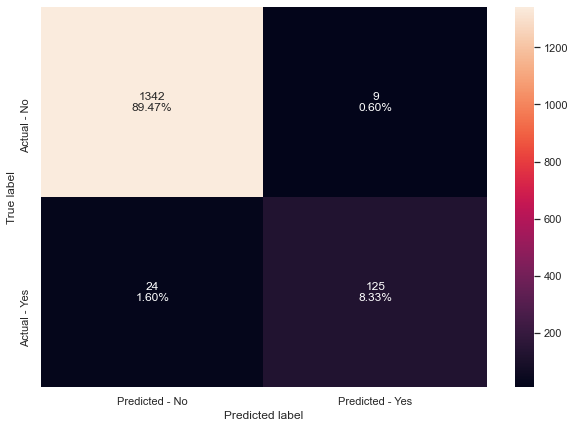

<IPython.core.display.Javascript object>

In [97]:
make_confusion_matrix2(dtmodel, Y_test)

- One of the objectives of the model is to correctly identify potential customers to purchase the personal loans. Therefore, getting recall is a good metric.

In [98]:
##  Function to calculate recall score
def get_recall_score(dtmodel):
    """
    model : classifier to predict values of X

    """
    pred_train = dtmodel.predict(X_train)
    pred_test = dtmodel.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(Y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(Y_test, pred_test))

<IPython.core.display.Javascript object>

In [99]:
get_recall_score(dtmodel)

Recall on training set :  1.0
Recall on test set :  0.8389261744966443


<IPython.core.display.Javascript object>

- There is a considerable difference between the models performance on the training set, and the testing set. Efforts will be made to improve the model's performance.

### Plotting the Decision Tree

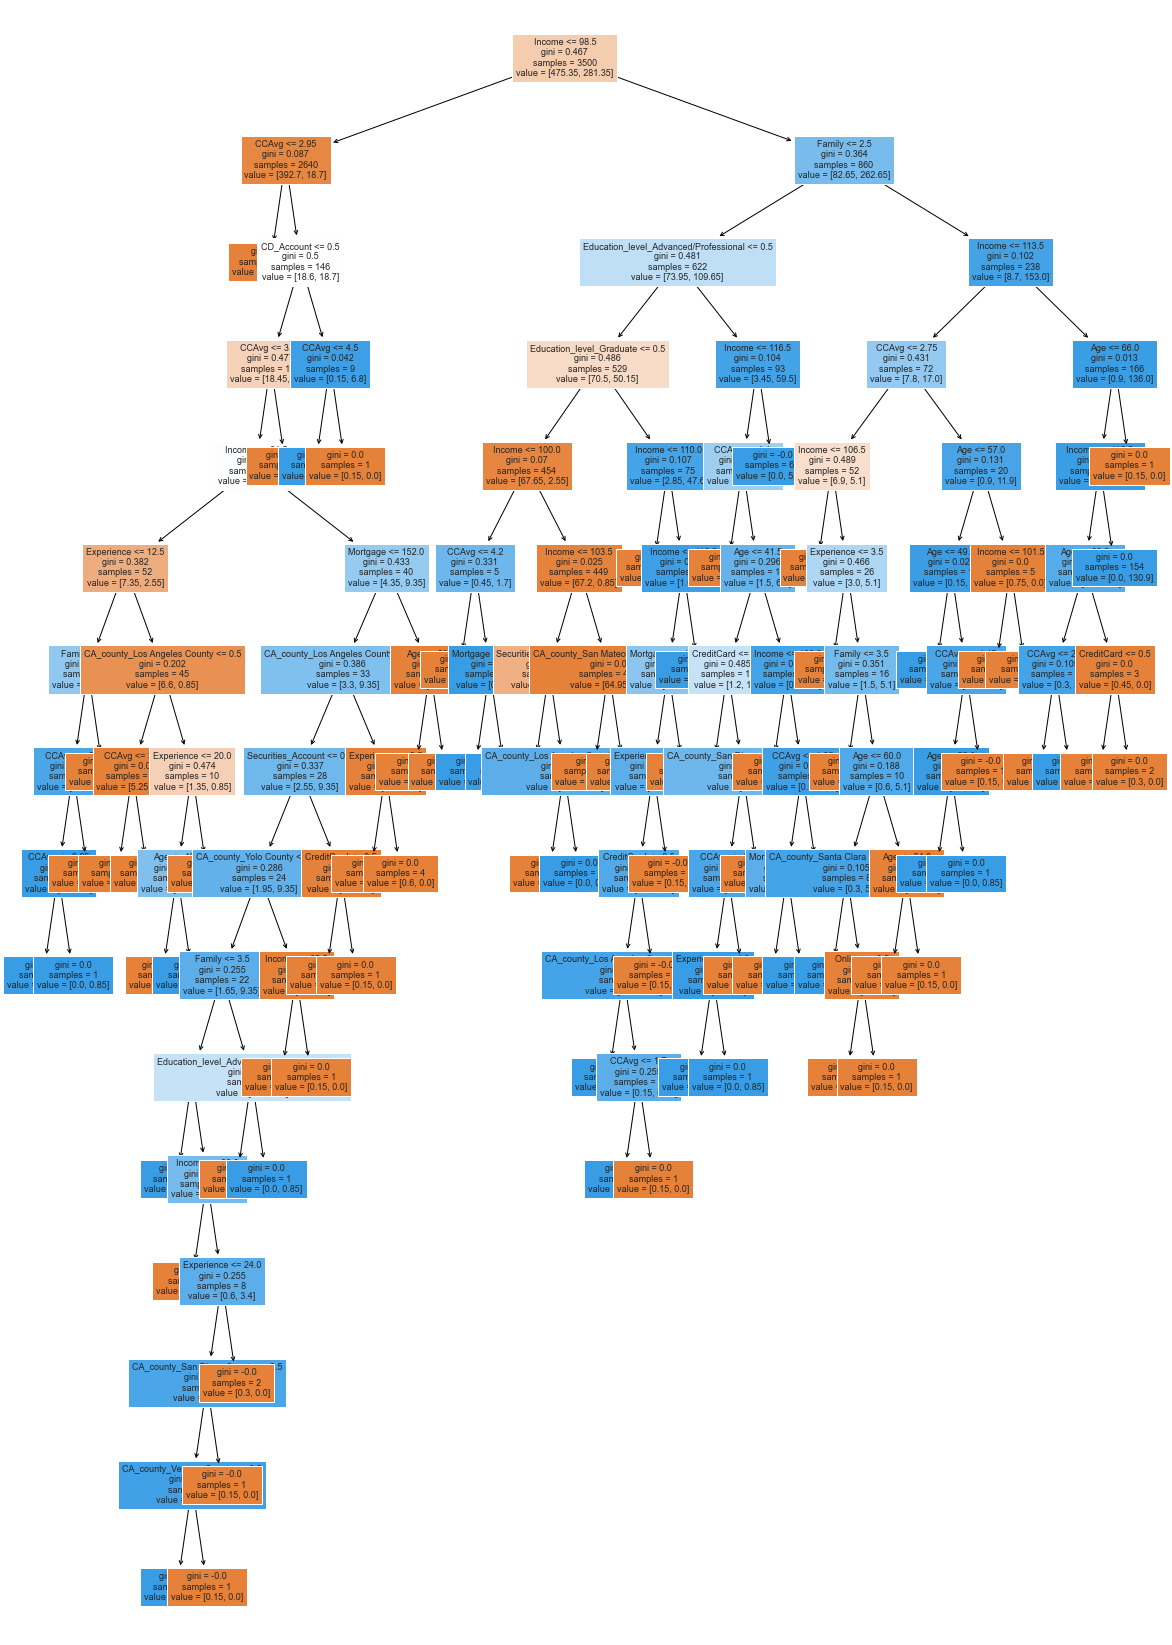

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Alternatively, the Decision Tree can be presented as a text as shown below

In [101]:
print(tree.export_text(dtmodel, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- CA_county_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.10
|   |   |   |   |   |   

<IPython.core.display.Javascript object>

- To understand the tree more, one can now create a DataFrame with Feature importance

In [102]:
# The importance of a feature is computed as the(normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance

print(
    pd.DataFrame(
        dtmodel.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                Imp
Income                                 5.949511e-01
Education_level_Graduate               1.366862e-01
CCAvg                                  7.831896e-02
Education_level_Advanced/Professional  6.761878e-02
Family                                 6.558580e-02
Experience                             1.130360e-02
CD_Account                             1.099955e-02
Age                                    1.094808e-02
Mortgage                               5.762198e-03
Securities_Account                     4.976279e-03
CA_county_Los Angeles County           4.575373e-03
CreditCard                             2.684094e-03
CA_county_San Diego County             1.980244e-03
CA_county_Santa Clara County           1.603101e-03
CA_county_Yolo County                  1.193814e-03
CA_county_Ventura County               8.128401e-04
CA_county_San Mateo County             2.447958e-16
Online                                 4.051662e-18
CA_county_Fr

<IPython.core.display.Javascript object>

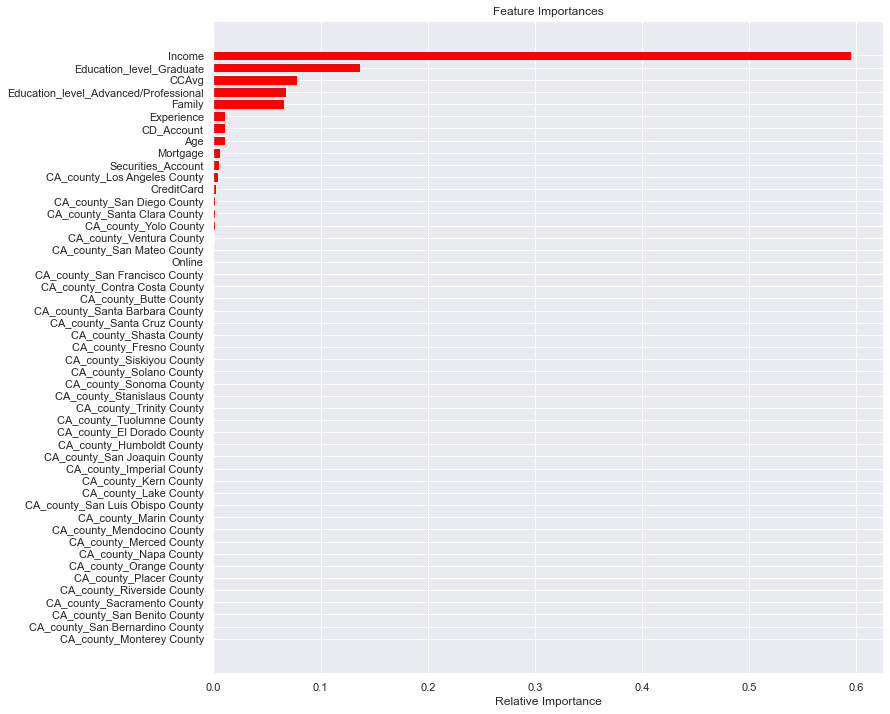

<IPython.core.display.Javascript object>

In [103]:
importances = dtmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The outputs above indicate that Income is the most important variable. Which seems to make sense intuitively. However, to be sure about the results, we will reduce overfitting in the model

### Overfit Reduction with GridSearchCV (Pre-pruning)


* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [104]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=9, max_features='log2',
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

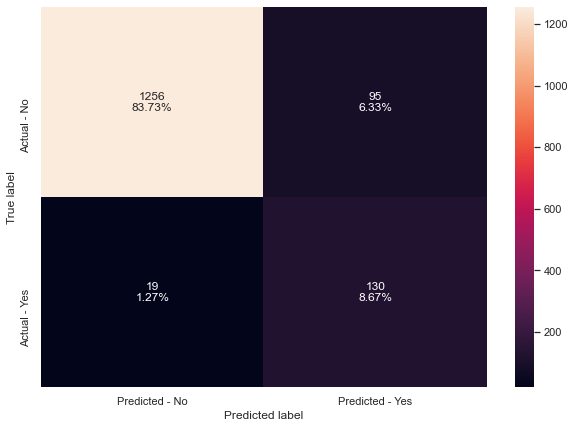

<IPython.core.display.Javascript object>

In [106]:
make_confusion_matrix2(estimator, Y_test)

#### Checking model performance

In [107]:
get_recall_score(estimator)

Recall on training set :  0.972809667673716
Recall on test set :  0.87248322147651


<IPython.core.display.Javascript object>

- The disparity between the training set and testing set has reduced by ~7 units. That is an improvement.

#### Checking the tree after hyperparameter tuning

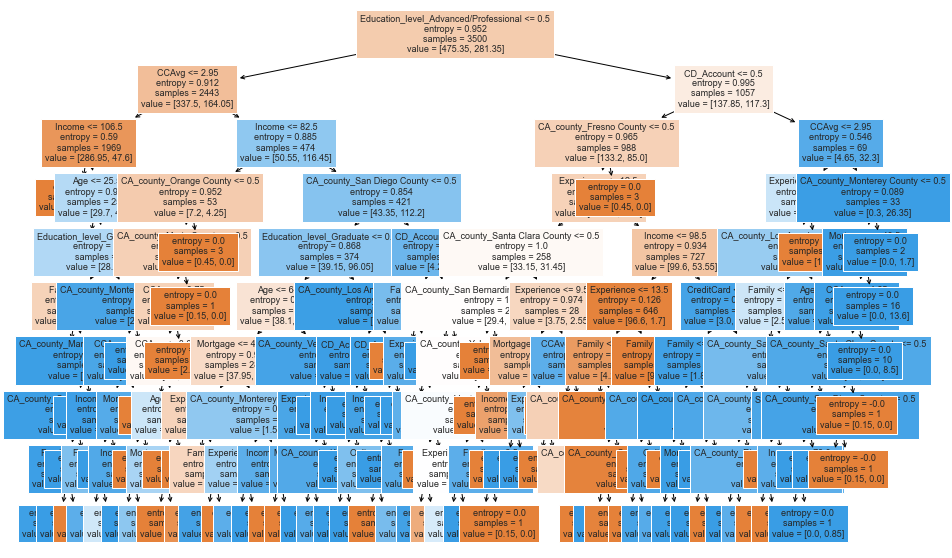

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Education_level_Advanced/Professional <= 0.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [257.25, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Age <= 25.50
|   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |--- Age >  25.50
|   |   |   |   |--- Education_level_Graduate <= 0.50
|   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |--- weights: [25.95, 0.00] class: 0
|   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |--- CA_county_Marin County <= 0.50
|   |   |   |   |   |   |   |--- CA_county_Orange County <= 0.50
|   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.30, 11.05] class: 1
|   |   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.25] class: 1
|   |   |   |   |   |   |   |--- CA_county_Orange County >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
| 

<IPython.core.display.Javascript object>

In [110]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see how importance of features has changed

                                            Imp
Income                                 0.424132
CCAvg                                  0.216064
Family                                 0.139598
Education_level_Graduate               0.101174
CD_Account                             0.041118
Experience                             0.026175
Education_level_Advanced/Professional  0.015148
Mortgage                               0.008344
Age                                    0.008053
CA_county_Kern County                  0.003605
CA_county_San Diego County             0.002164
CA_county_Yolo County                  0.002013
CreditCard                             0.001767
Online                                 0.001724
CA_county_Orange County                0.001595
CA_county_Los Angeles County           0.001358
CA_county_Santa Clara County           0.001141
CA_county_Ventura County               0.000777
CA_county_Riverside County             0.000649
CA_county_Shasta County                0

<IPython.core.display.Javascript object>

- Importance values of some of the features has definitely changed.
- Although income remains the most important, some of the other variables have changed, for instance, CCAvg has improved in importance.

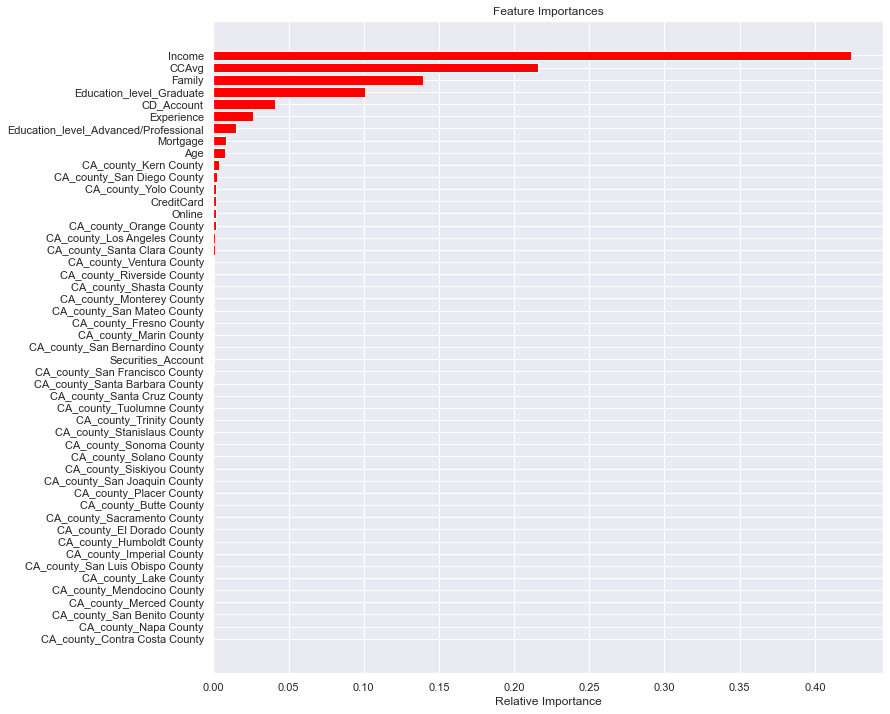

<IPython.core.display.Javascript object>

In [111]:
importances2 = estimator.feature_importances_
indices = np.argsort(importances2)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances2[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model is still not easily interpretable. It can be improved further through Post-Pruning with Cost Complexity Pruning


### Cost Complexity Pruning
In`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned.

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [112]:
dtp = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = dtp.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

- The relation between the effective alpha and leaf impurity can be visualized as shown below.

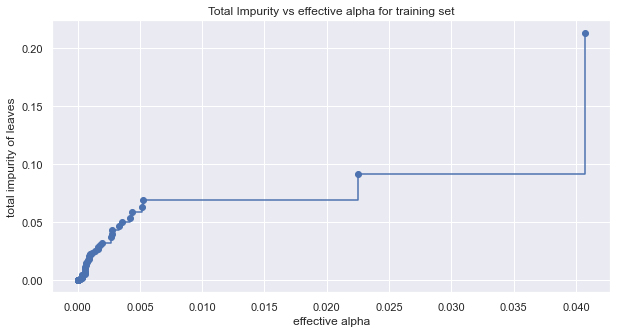

<IPython.core.display.Javascript object>

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next the tree is trained with the alphas

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    dtp = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    dtp.fit(X_train, Y_train)
    clfs.append(dtp)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)  # he last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489481034


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Note  here that the number of nodes and tree depth decreases as alpha increases.

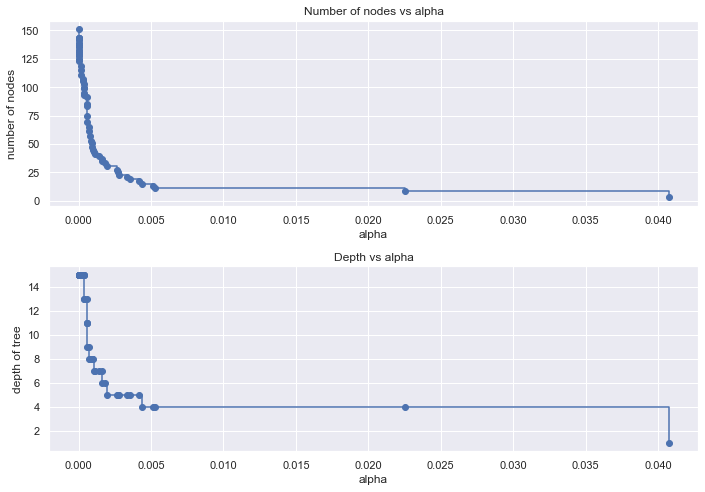

<IPython.core.display.Javascript object>

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Getting recalls on the operations

In [116]:
recall_train = []
for dtp in clfs:
    pred_train3 = dtp.predict(X_train)
    values_train = metrics.recall_score(Y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [117]:
recall_test = []
for dtp in clfs:
    pred_test3 = dtp.predict(X_test)
    values_test = metrics.recall_score(Y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [118]:
train_scores = [dtp.score(X_train, Y_train) for dtp in clfs]
test_scores = [dtp.score(X_test, Y_test) for dtp in clfs]

<IPython.core.display.Javascript object>

Next we can visualize the scores against the alphas

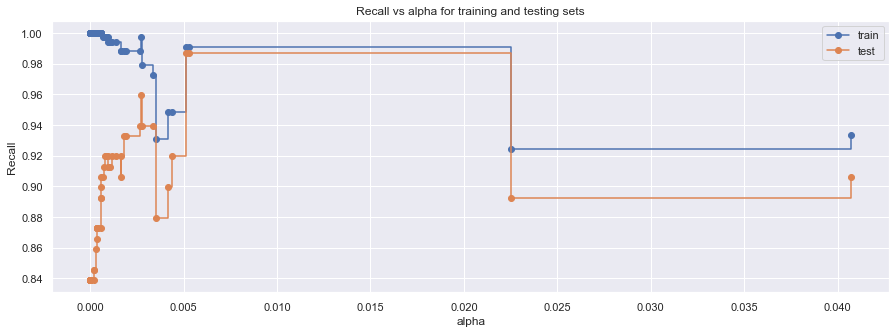

<IPython.core.display.Javascript object>

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- In this case we need to choose an alpha that gives us high recall scores on both the training and testing dataset. 0.005 seems like a good fit.




* *ps- the higher the alpha the less number of "leaves/branches" in the tree.*

In [120]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005138280016554104,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

- This output confirms the earlier visual estimate. The model can now be fit with the training data.

In [121]:
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.005138280016554104,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

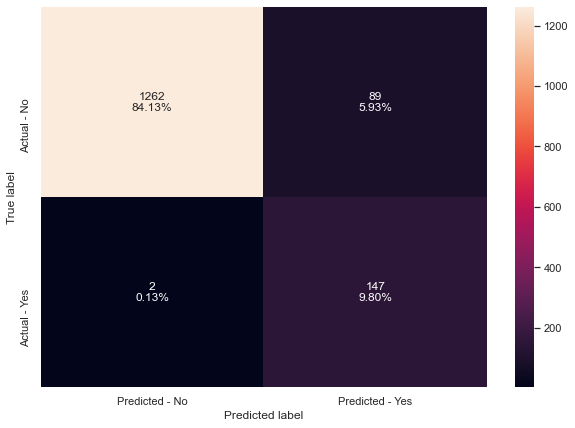

<IPython.core.display.Javascript object>

In [122]:
make_confusion_matrix2(best_model, Y_test)

In [123]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


<IPython.core.display.Javascript object>

- The model performs even better than before!
- It has higher recall scores, and the disparity between the training set and the test set has also reduced.
- Additionally, there is a slight increase in the number of correctly predicted/captured positives, which is good for the business.

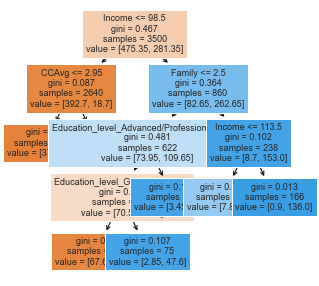

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_level_Advanced/Professional <= 0.50
|   |   |   |--- Education_level_Graduate <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_level_Graduate >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_level_Advanced/Professional >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- weights: [7.80, 17.00] class: 1
|   |   |--- Income >  113.50
|   |   |   |--- weights: [0.90, 136.00] class: 1



<IPython.core.display.Javascript object>

In [126]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Income                                 0.641593
Education_level_Graduate               0.158136
Education_level_Advanced/Professional  0.075928
Family                                 0.068540
CCAvg                                  0.055804
Age                                    0.000000
CA_county_Santa Clara County           0.000000
CA_county_Sacramento County            0.000000
CA_county_San Benito County            0.000000
CA_county_San Bernardino County        0.000000
CA_county_San Diego County             0.000000
CA_county_San Francisco County         0.000000
CA_county_San Joaquin County           0.000000
CA_county_San Luis Obispo County       0.000000
CA_county_San Mateo County             0.000000
CA_county_Santa Barbara County         0.000000
CA_county_Siskiyou County              0.000000
CA_county_Santa Cruz County            0.000000
CA_county_Shasta County                0.000000
CA_county_Placer County                0

<IPython.core.display.Javascript object>

- Income remains the important variable to determine whether one will get a personal loan or not.
- Interestingly, in the top 5 most important variables in all models income, Family, average spending on credit card, and Education level (Gradute) have all been there, albeit with varying importance.

- A summary of the models is presented below in a DataFrame

In [127]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 0.9728, 0.9909],
        "Test_Recall": [0.8389, 0.8725, 0.9866],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.0000,0.8389
1,Decision tree with hyperparameter tuning,0.9728,0.8725
2,Decision tree with post-pruning,0.9909,0.9866


<IPython.core.display.Javascript object>

- Model after post-pruning performed best of the three Decision Tree,models.
- One can then compare the results from the Decision Tree and those from the statsmodel to see which approach had the better results

In [128]:
model_comparison

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.958857,0.958667,0.676737,0.657718,0.858238,0.899083,0.756757,0.759690
1,Logistic Regression - Optimal threshold = 0 .07,0.885714,0.892667,0.915408,0.899329,0.448889,0.478571,0.602386,0.624709
2,Logistic Regression - Optimal threshold = 0 .33,0.957714,0.954000,0.773414,0.724832,0.778116,0.794118,0.775758,0.757895


<IPython.core.display.Javascript object>

- The Decision Tree model with Post-Pruning had the best recall scores of all the models available

### Exploratory Data Analysis on the incorrectly predicted data

- do a prediction on the entire data (dataframe you had before the split) and add the predictions as one of the variables in the dataset wherein you can compare the actuals vs predicted and perform an EDA for observations where you see a difference in both.

In [129]:
newmodel = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

newmodel.fit(df4, Y)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

In [130]:
# make_confusion_matrix2(newmodel, Y_test)

<IPython.core.display.Javascript object>

### Recommendations

- Despite the models’ varying scores some interpretations can still be made.
- For instance, Income, family, CCAvg, securities account, cd account, online, credit card, education level are all significant. And based on their coefficients, action can be taken accordingly. As an illustration, As the odds and percentages from the coefficients indicate, having a CD_Account and high education level increase the chances of one purchasing a personal loan by more than 4500%
- Using online banking facilities and having a Securities Account have the opposite effect (>40%) by indicating a decrease on chances of purchasing a personal loan the more those variables increase.
- A unit increase in the variables with positive coefficients corresponds with an increase in chances of purchasing a personal loan. The bank should, therefore, focus on those things that contribute to that increase. This could be maybe by visiting graduate schools and pitching their business!
- As for the variables with negative coefficients, an increase in those corresponds to a decrease in the likelihood of purchasing a personal loan. The bank should mitigate such variables.
- Results from the EDA revealed also some areas the bank could improve on such as getting more customers using the bank’s securities account, CD accounts, and credit cards.
- The results also indicate that using of online banking services corresponds with more personal loans. The bank should capitalize on this maybe through more online ads.
